# Image Transformations Lab
All  of  the  programming  assignments  are  to  be  done  in  Python  using  additional  libraries  specified  in  the  assignments.  There  are many  libraries  available,  some  of  which  we  will  be  using,  and  you  are  welcome  to  use  them  with  one  exception:  if  the  library  or  a  function  within  it  performs  the  specific  function  you  are  asked  to  code,  you  may  not  use  that  other  than  perhaps  as  a  reference  to  compare  against. All  of  the  code  you  submit  must  be  your  own. You are welcome to turn in a completed jupyter notebook.

The following code will load an image you can use for this lab. If needed make sure to install PIL using *pip install PIL* or *conda install PIL*.

**Note:** On the homework, the direction of the positve Y-axis was up. In this lab (and most image packages), the direction of the positive Y-axis is down. This means that you will need to rotate in the opposite direction of what you did on the homework.

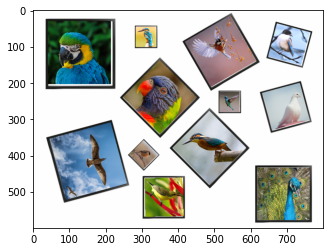

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math


def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result


#Open the two images
filename = "PictureFrameCollage.png"
frame = Image.open(filename).convert("RGB")

filename0 = "Bird0.png"
im = Image.open(filename0).convert("RGB")

images = ["Bird" + str(i) + ".png" for i in range(12)]

matricies = [makeMatrix(1.21,0,41,30),makeMatrix(.389,0,283,46),makeMatrix(1,30,419,87),makeMatrix(.653,-15,673,37),makeMatrix(1,-45,350,138),
             makeMatrix(.389,0,514,225), makeMatrix(.736,15,633,228), makeMatrix(1.21,15,46,354), makeMatrix(.389,-45,305,358),makeMatrix(1,45,385,379),
             makeMatrix(.736,1,308,463), makeMatrix(1,0,619,434)]
result = frame
for index, imgName in enumerate(images):
  currImg = Image.open(imgName).convert("RGB")
  result = compose(result, currImg, matricies[index])

#Compose the two images together
# result = compose(frame, im, transformation)
    
#Show the result
plt.imshow(result)
plt.show()
#Uncomment this line if you want to save the image
result.save("Output.png")

Tip: Make sure you are comfortable with building your own transformations and how the compositing code works, then try implementing your own general transform function.

In [ ]:
def makeMatrix(scale, rotate, tranx, trany):
  scaleMatrix = np.matrix([[scale, 0 ,0], [0,scale,0],[0,0,1]])
  t = math.radians(-rotate)
  rotateMatrix = np.matrix([[math.cos(t), -math.sin(t), 0], [math.sin(t), math.cos(t), 0], [0,0,1]])
  translationMatrix = np.matrix([[1,0,tranx],[0,1,trany], [0,0,1]])
  return translationMatrix * rotateMatrix * scaleMatrix
